In [1]:
%load_ext autoreload
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn enhances the aesthetics of matplotlib plots

import pandas as pd
import xarray as xr
import seaborn as sns
import warnings
import logging
# sns.set()

from tempest import casestudy
from tempest import grid
from tempest import storm_tracker
from tempest import joint_distrib
from tempest import handler
from tempest.plots.hist import simple_hist

In [2]:
def lognancount(data):
    return np.log(np.count_nonzero(~np.isnan(data)))

Data loaded from /scratchx/mcarenso/tempest/OBS_Winter_lowRes_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /scratchx/mcarenso/tempest/OBS_Winter_lowRes_Tropics/grid_attributes.pkl instead of computing


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
ocean 281362.0
land 122723.0


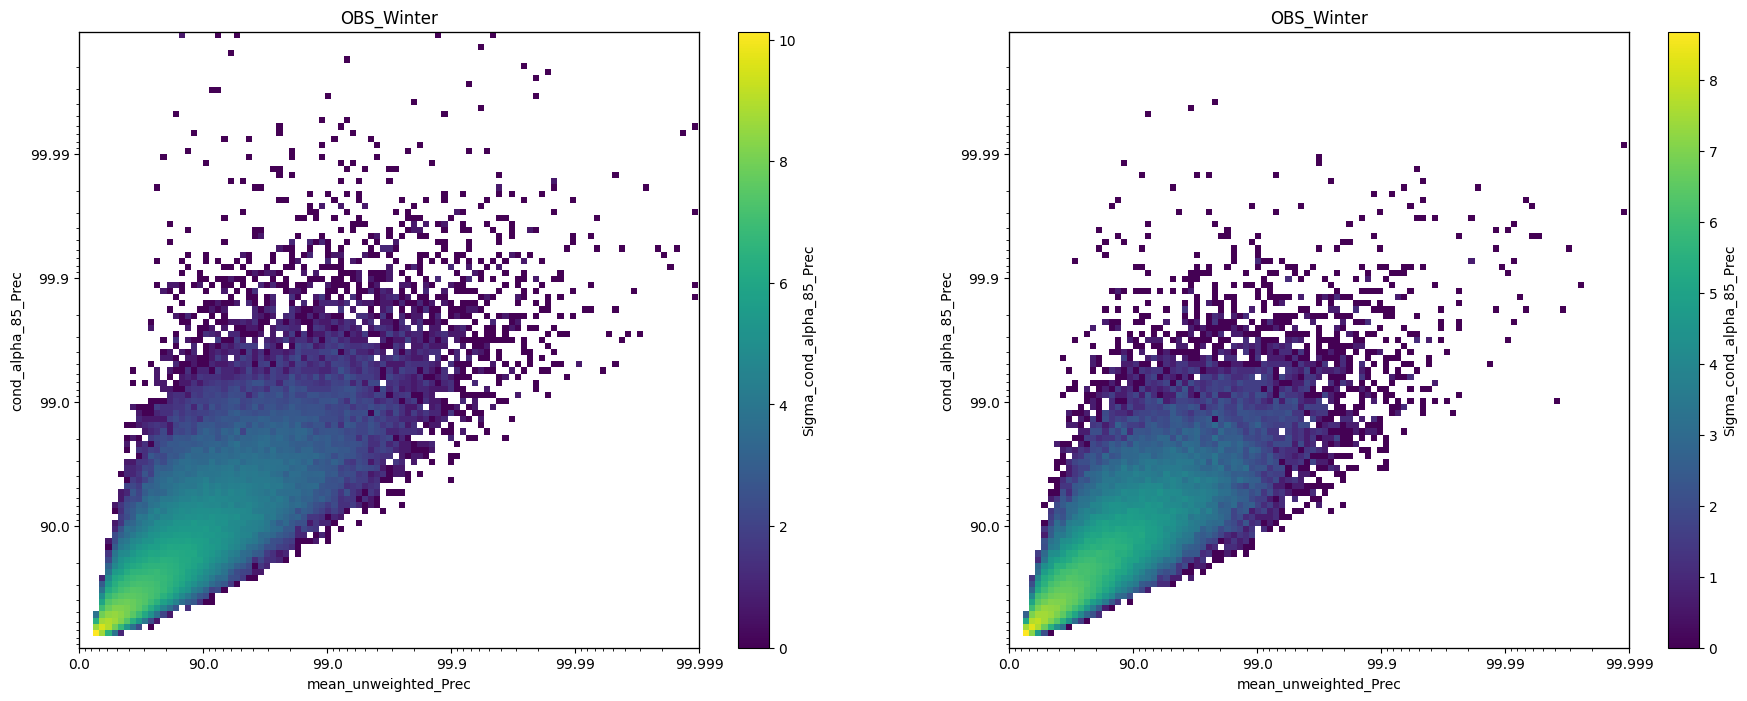

In [3]:
settings_path = 'settings/obs_winter_30d.yaml'
hdlr = handler.Handler(settings_path)
cs = casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False)
gr = grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False)
st = storm_tracker.StormTracker(gr, label_var_id = "MCS_label", overwrite_storms = False, overwrite = False)
jd = joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_85_Prec",nbpd = 20,  nd=5, overwrite = True, dist_mask = False)

fig, axs = plt.subplots(1, 2, figsize = (22, 8))
model_name = jd.settings["MODEL"][:-7]
cmap = sns.color_palette("icefire", as_cmap=True)
# values_and_boundaries = np.arange(0, 0.05+0.001, 0.001)
# values = values_and_boundaries[1::2]
# boundaries  = values_and_boundaries[::2]
# norm = mpl.colors.BoundaryNorm(boundaries, cmap.N)

ax, cbar, ax_show, ocean = jd.plot_var_id_func_over_jdist('Prec', func = 'Sigma_cond_alpha_85', title=model_name, plot_func = lognancount, mask = "ocean", fig = fig, ax = axs[0])
ax, cbar, ax_show, land = jd.plot_var_id_func_over_jdist('Prec', func = 'Sigma_cond_alpha_85', title=model_name, plot_func = lognancount, mask = "land", fig = fig, ax = axs[1])
print("ocean", np.nansum(np.exp(ocean)))
print("land", np.nansum(np.exp(land)))